ASSIGNMENT 4_CEE690

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (10,4)

# The original URL points to the HTML page of the file on GitHub, not the raw data.
# We need to modify it to access the raw content.
url = 'https://raw.githubusercontent.com/m-zaniolo/CEE690-ESAA/main/data/'
inflow = pd.read_csv(url + 'SHA-2000-2020-monthly.csv')
#Generate date array from October 31, 2000, to September 30, 2020
date_range = pd.date_range(start='2000-10-31', end='2020-09-30', freq='ME')

#Question 1

In [89]:
def simulate(Theta):

    # Constants and Assumptions
    max_storage = 4552  # TAF
    cfm_to_taf = 2.29568411e-8  # conversation factor; cfm--->TAF
    MEF = 50  # TAF
    demand = 400  # TAF
    excess = 800  # TAF
    Theta_1 = 1000  # TAF
    Theta_2 = 4000  # TAF

    # Initialize Theta values
    Theta_1, Theta_2 = Theta

    # Initialize storage and release arrays
    storage = np.zeros(len(inflow))
    release = np.zeros(len(inflow))

    # Initial storage (assuming starting at full capacity)
    storage[0] = max_storage

    # Simulation loop
    for t in range(1, len(inflow)):
        # Calculate inflow in TAF
        inflow_taf = inflow['SHA_INFLOW_CFMonth'][t] * cfm_to_taf  # Convert to TAF

        # Calculate storage before release
        storage[t] = storage[t - 1] + inflow_taf

        # Determine release based on storage and Theta values
        if storage[t] < Theta_1:
            release[t] = MEF
        elif storage[t] < Theta_2:
            release[t] = demand
        else:
            release[t] = excess

        # Update storage after release
        storage[t] -= release[t]

    # Calculate flood day indicator (before constraints)
    flood_indicator1 = np.sum(storage > max_storage)  # indicator obtained in question 1

    # Calculate water deficit indicator
    deficit_indicator1 = np.sum(release < demand)  # indicator obtained in question 1

    return storage, release, flood_indicator1, deficit_indicator1


#Question 2

In [81]:
!pip install platypus-opt

In [82]:
from platypus import Problem, Real, NSGAII

def objective_function(Theta):
    """Calculates flood and deficit indicators for given Theta values."""
    _, _, flood_indicator, deficit_indicator = simulate(Theta)
    return [flood_indicator, deficit_indicator]  # Minimize both indicators
 # Define the problem
max_storage = 4552
problem = Problem(2, 2)  # 2 decision variables (Theta_1, Theta_2), 2 objectives (flood, deficit)
problem.types[:] = [Real(0, max_storage), Real(0, max_storage)]  # Bounds for Theta_1 and Theta_2
problem.function = objective_function
 # Create the optimization algorithm (NSGA-II)
algorithm = NSGAII(problem)

# Run the optimization with a specified number of function evaluations (NFE)
max_NFE = 10000  # Example value, adjust as needed
algorithm.run(max_NFE)

# Get the results
results = algorithm.result

In [83]:
#Reformulate the function to only give flood and decifit indicators as only outputs
from platypus import Problem, Real, NSGAII
import numpy as np # Make sure numpy is imported

def simulate_modified(Theta):
    """Calculates flood and deficit indicators for given Theta values."""
    storage, release, flood_indicator, deficit_indicator = simulate(Theta)  # Call original simulate
    return [flood_indicator, deficit_indicator]  # Minimize both indicators

# Define the problem
max_storage = 4552
problem = Problem(2, 2)  # 2 decision variables (Theta_1, Theta_2), 2 objectives (flood, deficit)
problem.types[:] = [Real(0, max_storage), Real(0, max_storage)]  # Bounds for Theta_1 and Theta_2
problem.function = simulate_modified #Modified this line to match the defined function
# Create the optimization algorithm (NSGA-II)
algorithm = NSGAII(problem)

# Run the optimization with a specified number of function evaluations (NFE)
max_NFE = 10000  # Example value, adjust as needed
algorithm.run(max_NFE)

# Get a single solution from results
Theta = algorithm.result[0].variables # example usage

# Calculate flood day indicator (before constraints)
storage, release, _, _ = simulate(Theta) # call simulate with selected Theta values
flood_indicator = np.sum(storage > max_storage)

# Calculate water deficit indicator
demand = 400
deficit_indicator = np.sum(release < demand)

print(f"flood_indicator : {flood_indicator}, deficit_indicator: {deficit_indicator}")

flood_indicator : 12, deficit_indicator: 6


#Question 3

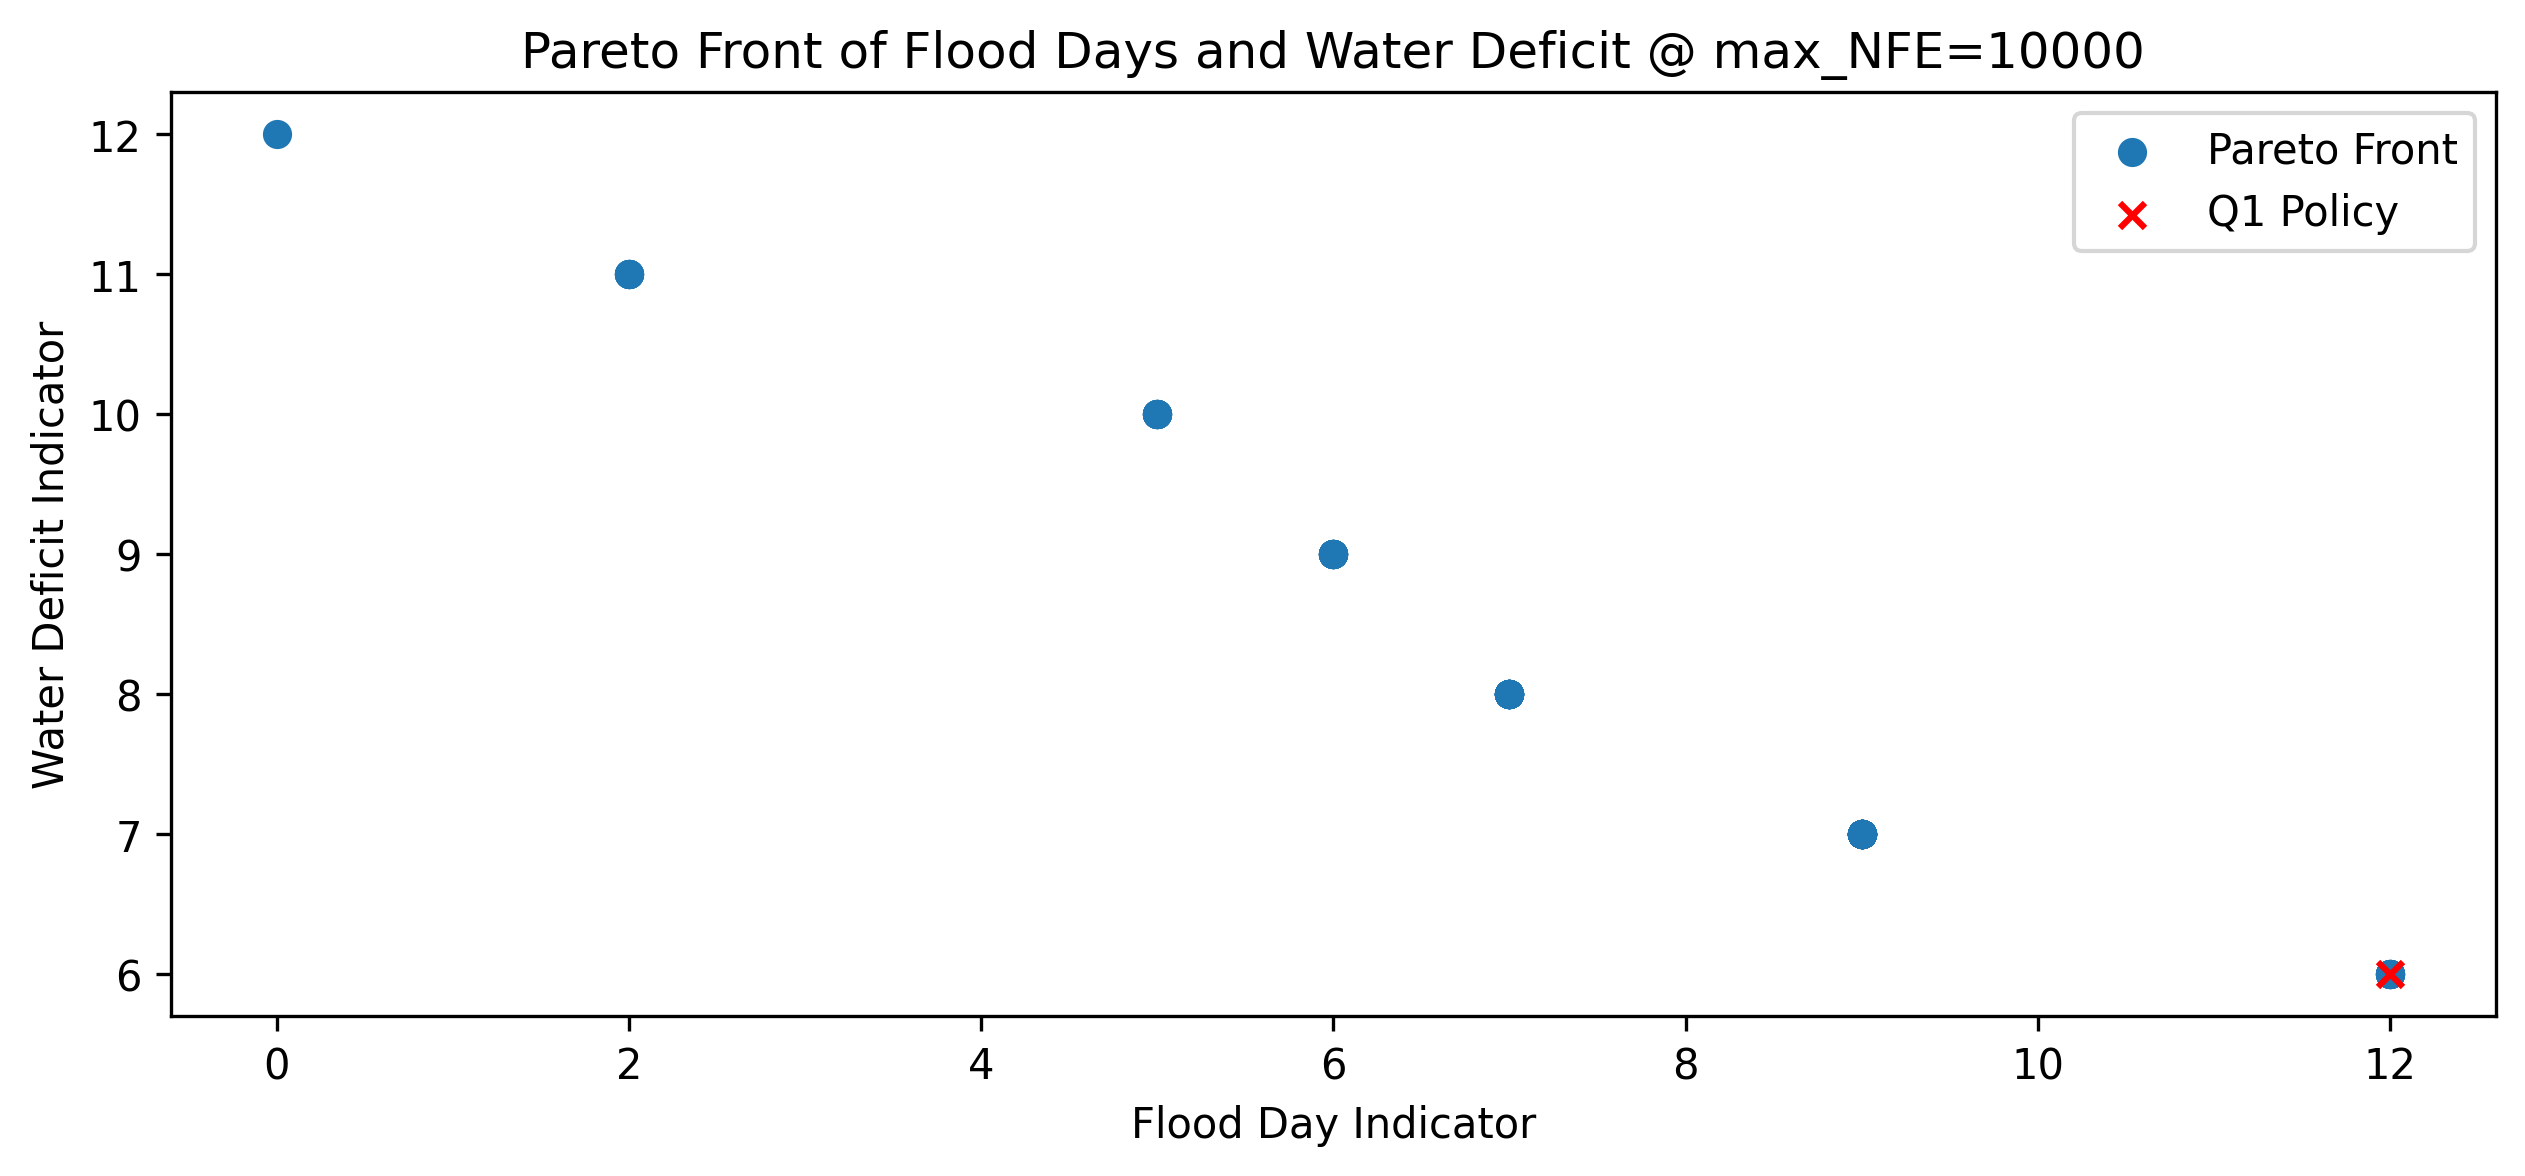

<Figure size 3000x1200 with 0 Axes>

In [84]:
#Extract Flood and Deficit values from the optimization results
flood_values = [s.objectives[0] for s in results]
deficit_values = [s.objectives[1] for s in results]

#Plot the Pareto front:
plt.scatter(flood_values, deficit_values, marker='o', label='Pareto Front')
plt.xlabel('Flood Day Indicator')
plt.ylabel('Water Deficit Indicator')
plt.title('Pareto Front of Flood Days and Water Deficit @ max_NFE=10000')

#Add the policy results from Question 1
plt.scatter(flood_indicator, deficit_indicator, marker='x', color='red', label='Q1 Policy')
plt.legend()
plt.show()
plt.savefig('Pareto Front @10000.jpg')

#Question 4

flood_indicator : 9, deficit_indicator: 240


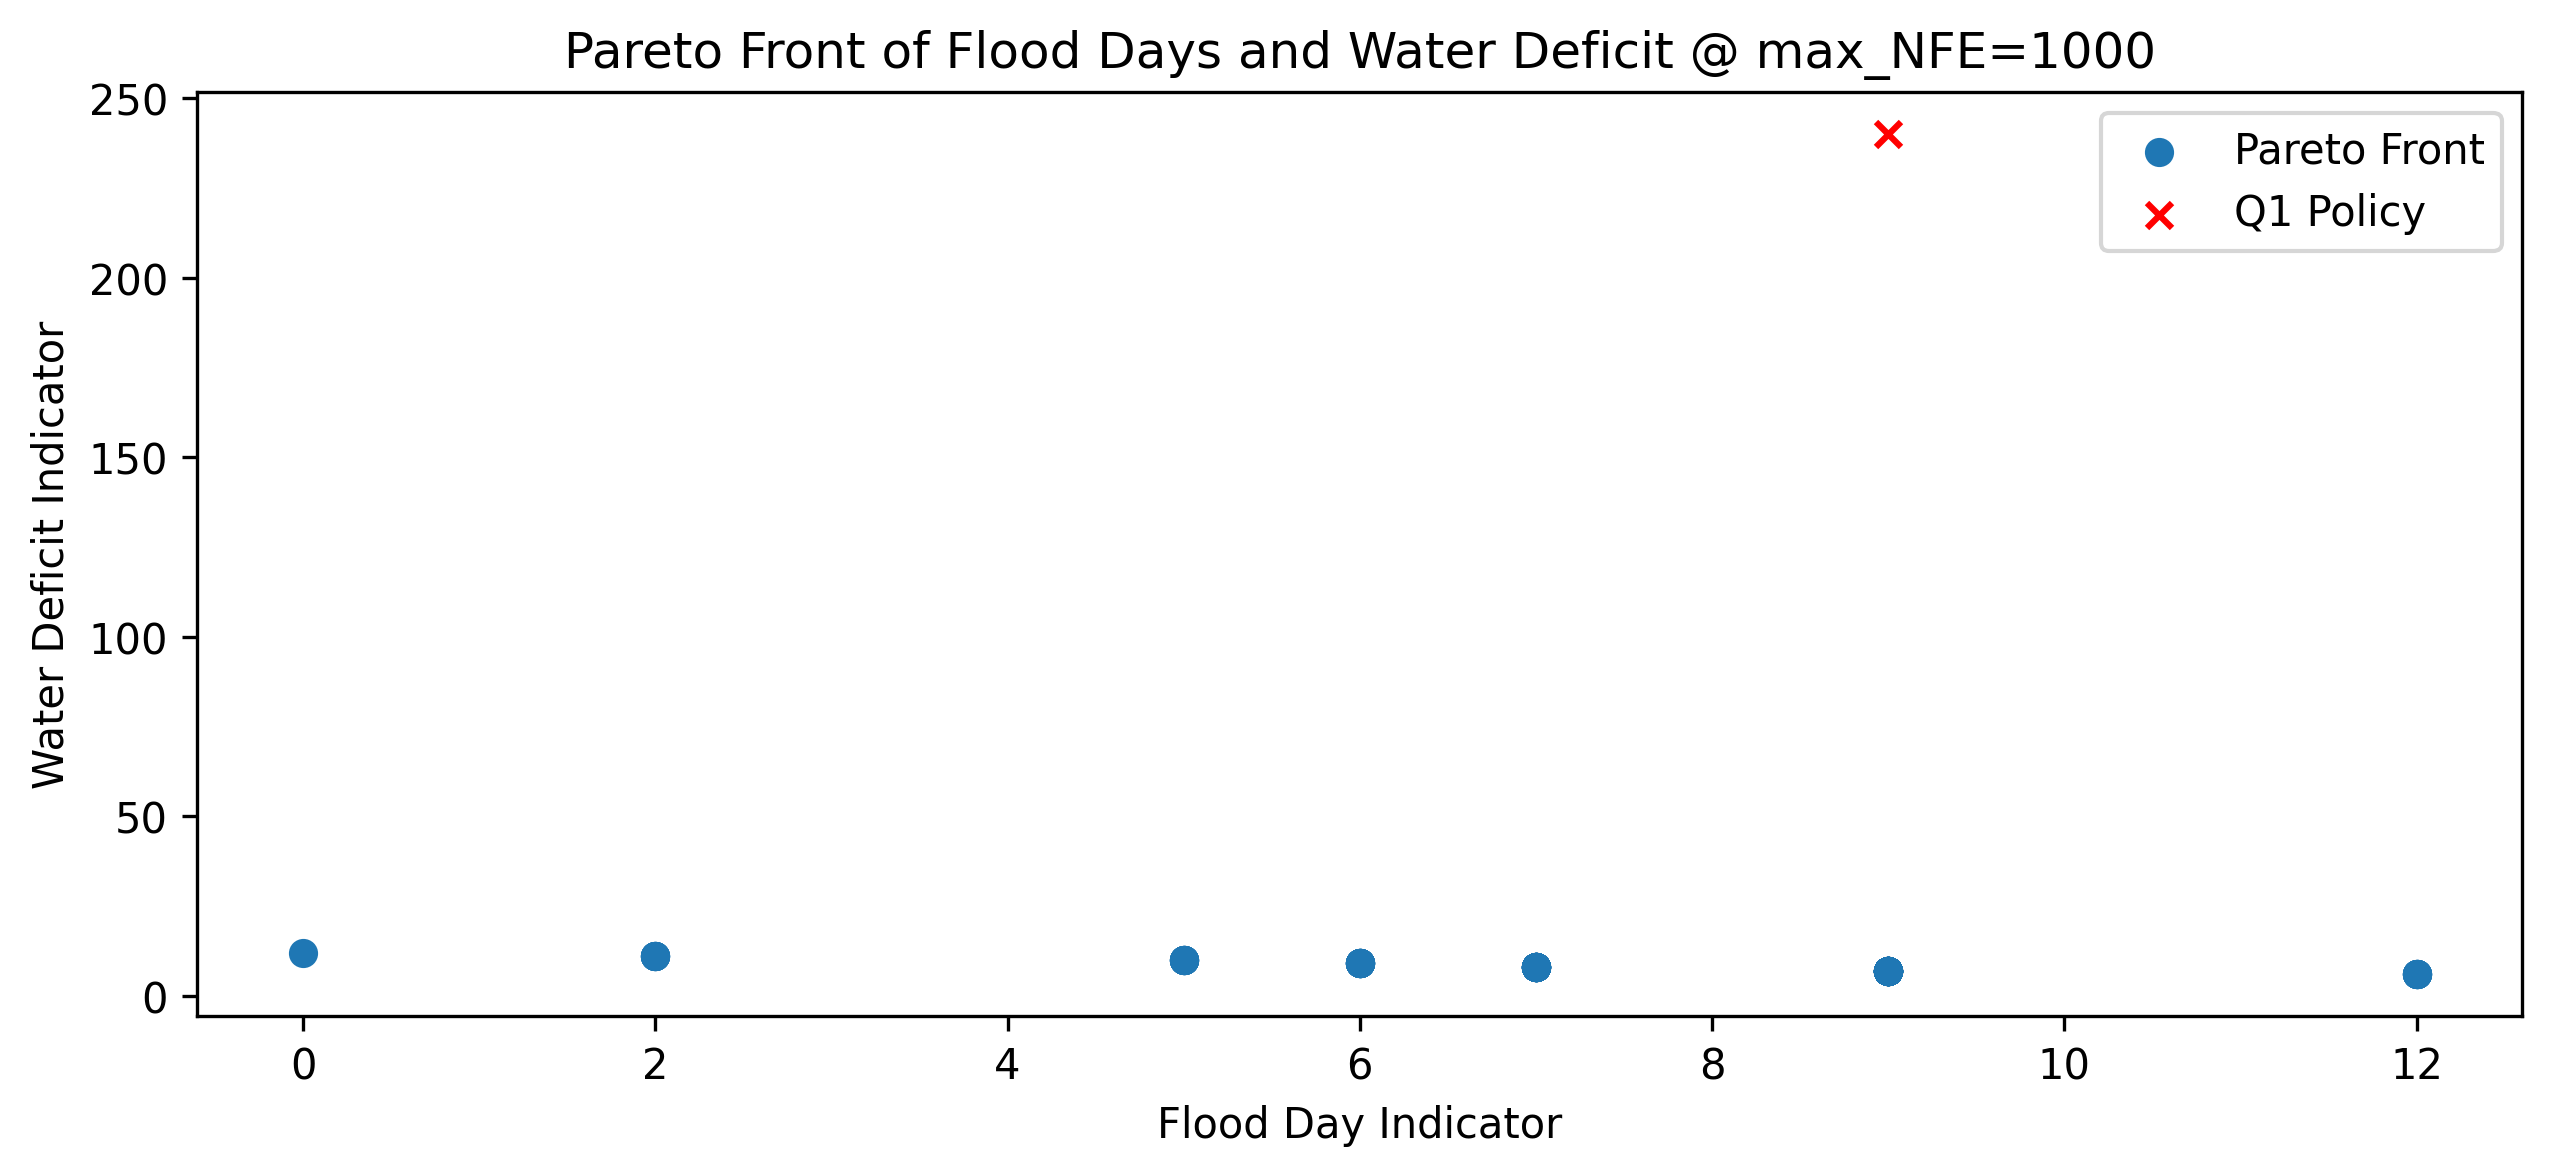

<Figure size 3000x1200 with 0 Axes>

In [85]:
#Changing max_NFE=1000
from platypus import Problem, Real, NSGAII
import numpy as np # Make sure numpy is imported

def simulate_modified(Theta):
    """Calculates flood and deficit indicators for given Theta values."""
    storage, release, flood_indicator, deficit_indicator = simulate(Theta)  # Call original simulate
    return [flood_indicator, deficit_indicator]  # Minimize both indicators

# Define the problem
max_storage = 4552
problem = Problem(2, 2)  # 2 decision variables (Theta_1, Theta_2), 2 objectives (flood, deficit)
problem.types[:] = [Real(0, max_storage), Real(0, max_storage)]  # Bounds for Theta_1 and Theta_2
problem.function = simulate_modified #Modified this line to match the defined function
# Create the optimization algorithm (NSGA-II)
algorithm = NSGAII(problem)

# Run the optimization with a specified number of function evaluations (NFE)
max_NFE = 400  #
algorithm.run(max_NFE)

# Get a single solution from results
Theta = algorithm.result[0].variables # example usage

# Calculate flood day indicator (before constraints)
storage, release, _, _ = simulate(Theta) # call simulate with selected Theta values
flood_indicator = np.sum(storage > max_storage)

# Calculate water deficit indicator
demand = 1000
deficit_indicator = np.sum(release < demand)

print(f"flood_indicator : {flood_indicator}, deficit_indicator: {deficit_indicator}")

#Extract Flood and Deficit values from the optimization results
flood_values = [s.objectives[0] for s in results]
deficit_values = [s.objectives[1] for s in results]

#Plot the Pareto front:
plt.scatter(flood_values, deficit_values, marker='o', label='Pareto Front')
plt.xlabel('Flood Day Indicator')
plt.ylabel('Water Deficit Indicator')
plt.title('Pareto Front of Flood Days and Water Deficit @ max_NFE=1000')

#Add the policy results from Question 1
plt.scatter(flood_indicator, deficit_indicator, marker='x', color='red', label='Q1 Policy')
plt.legend()
plt.show()
plt.savefig('Pareto Front @1000.jpg')

flood_indicator : 9, deficit_indicator: 43


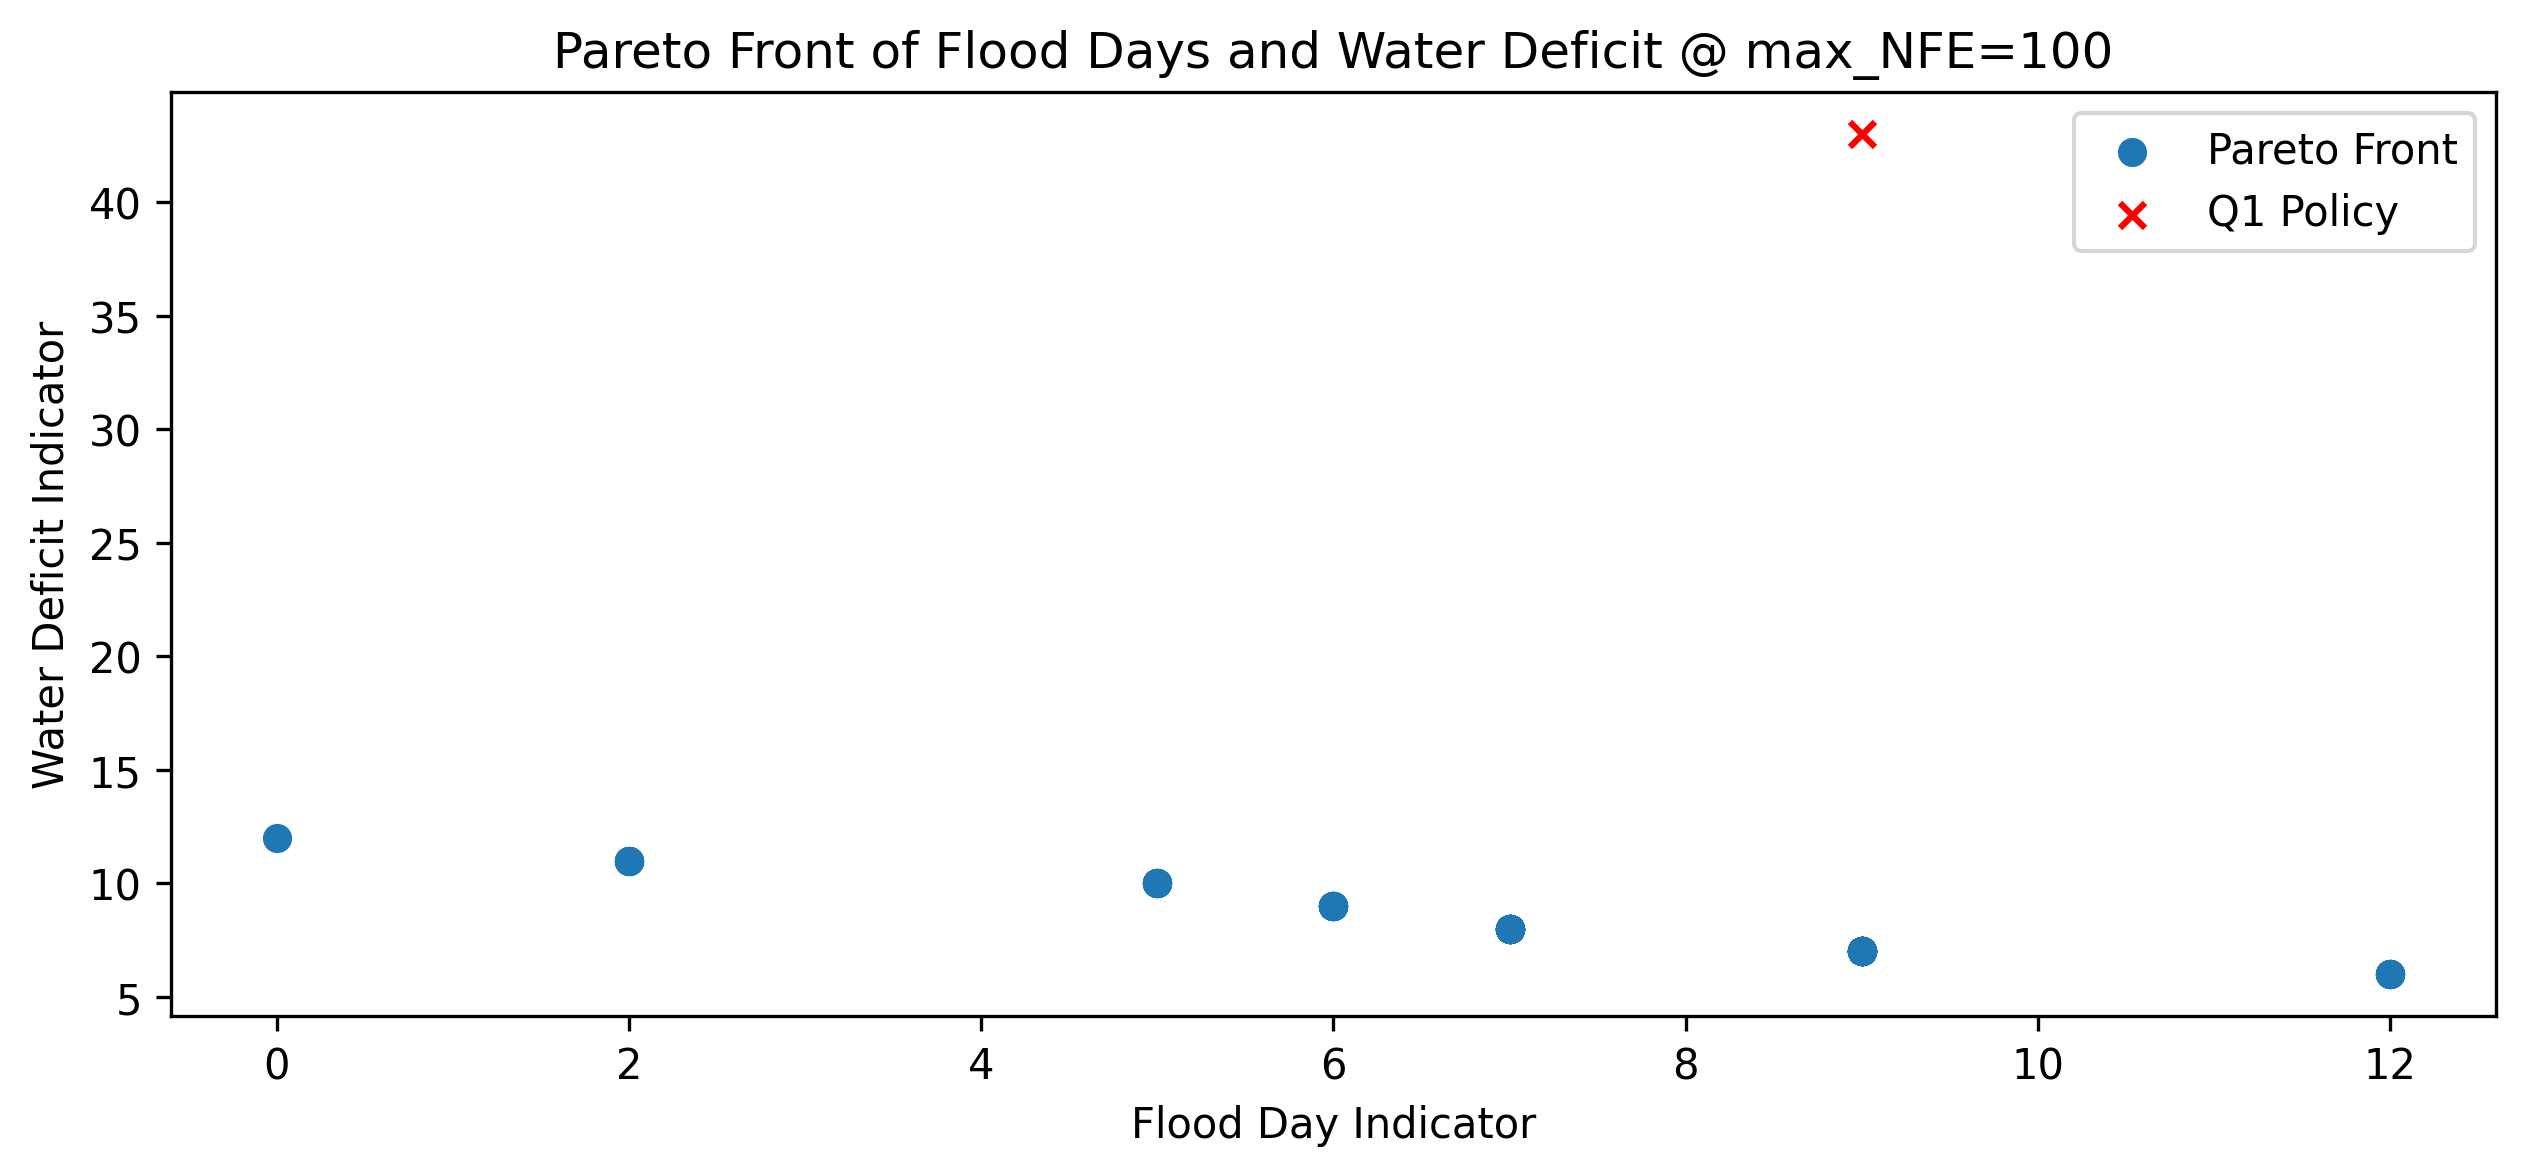

<Figure size 3000x1200 with 0 Axes>

In [87]:
#Changing max_NFE=100
from platypus import Problem, Real, NSGAII
import numpy as np # Make sure numpy is imported

def simulate_modified(Theta):
    """Calculates flood and deficit indicators for given Theta values."""
    storage, release, flood_indicator, deficit_indicator = simulate(Theta)  # Call original simulate
    return [flood_indicator, deficit_indicator]  # Minimize both indicators

# Define the problem
max_storage = 4552
problem = Problem(2, 2)  # 2 decision variables (Theta_1, Theta_2), 2 objectives (flood, deficit)
problem.types[:] = [Real(0, max_storage), Real(0, max_storage)]  # Bounds for Theta_1 and Theta_2
problem.function = simulate_modified #Modified this line to match the defined function
# Create the optimization algorithm (NSGA-II)
algorithm = NSGAII(problem)

# Run the optimization with a specified number of function evaluations (NFE)
max_NFE = 100
algorithm.run(max_NFE)

# Get a single solution from results
Theta = algorithm.result[0].variables # example usage

# Calculate flood day indicator (before constraints)
storage, release, _, _ = simulate(Theta) # call simulate with selected Theta values
flood_indicator = np.sum(storage > max_storage)

# Calculate water deficit indicator
demand = 400
deficit_indicator = np.sum(release < demand)

print(f"flood_indicator : {flood_indicator}, deficit_indicator: {deficit_indicator}")

#Extract Flood and Deficit values from the optimization results
flood_values = [s.objectives[0] for s in results]
deficit_values = [s.objectives[1] for s in results]

#Plot the Pareto front:
plt.scatter(flood_values, deficit_values, marker='o', label='Pareto Front')
plt.xlabel('Flood Day Indicator')
plt.ylabel('Water Deficit Indicator')
plt.title('Pareto Front of Flood Days and Water Deficit @ max_NFE=100')

#Add the policy results from Question 1
plt.scatter(flood_indicator, deficit_indicator, marker='x', color='red', label='Q1 Policy')
plt.legend()
plt.show()
plt.savefig('Pareto Front @100.jpg')

#Question 5

Flood-prone policy: Theta_1 = 238.5352869163416, Theta_2 = 4549.221105089943


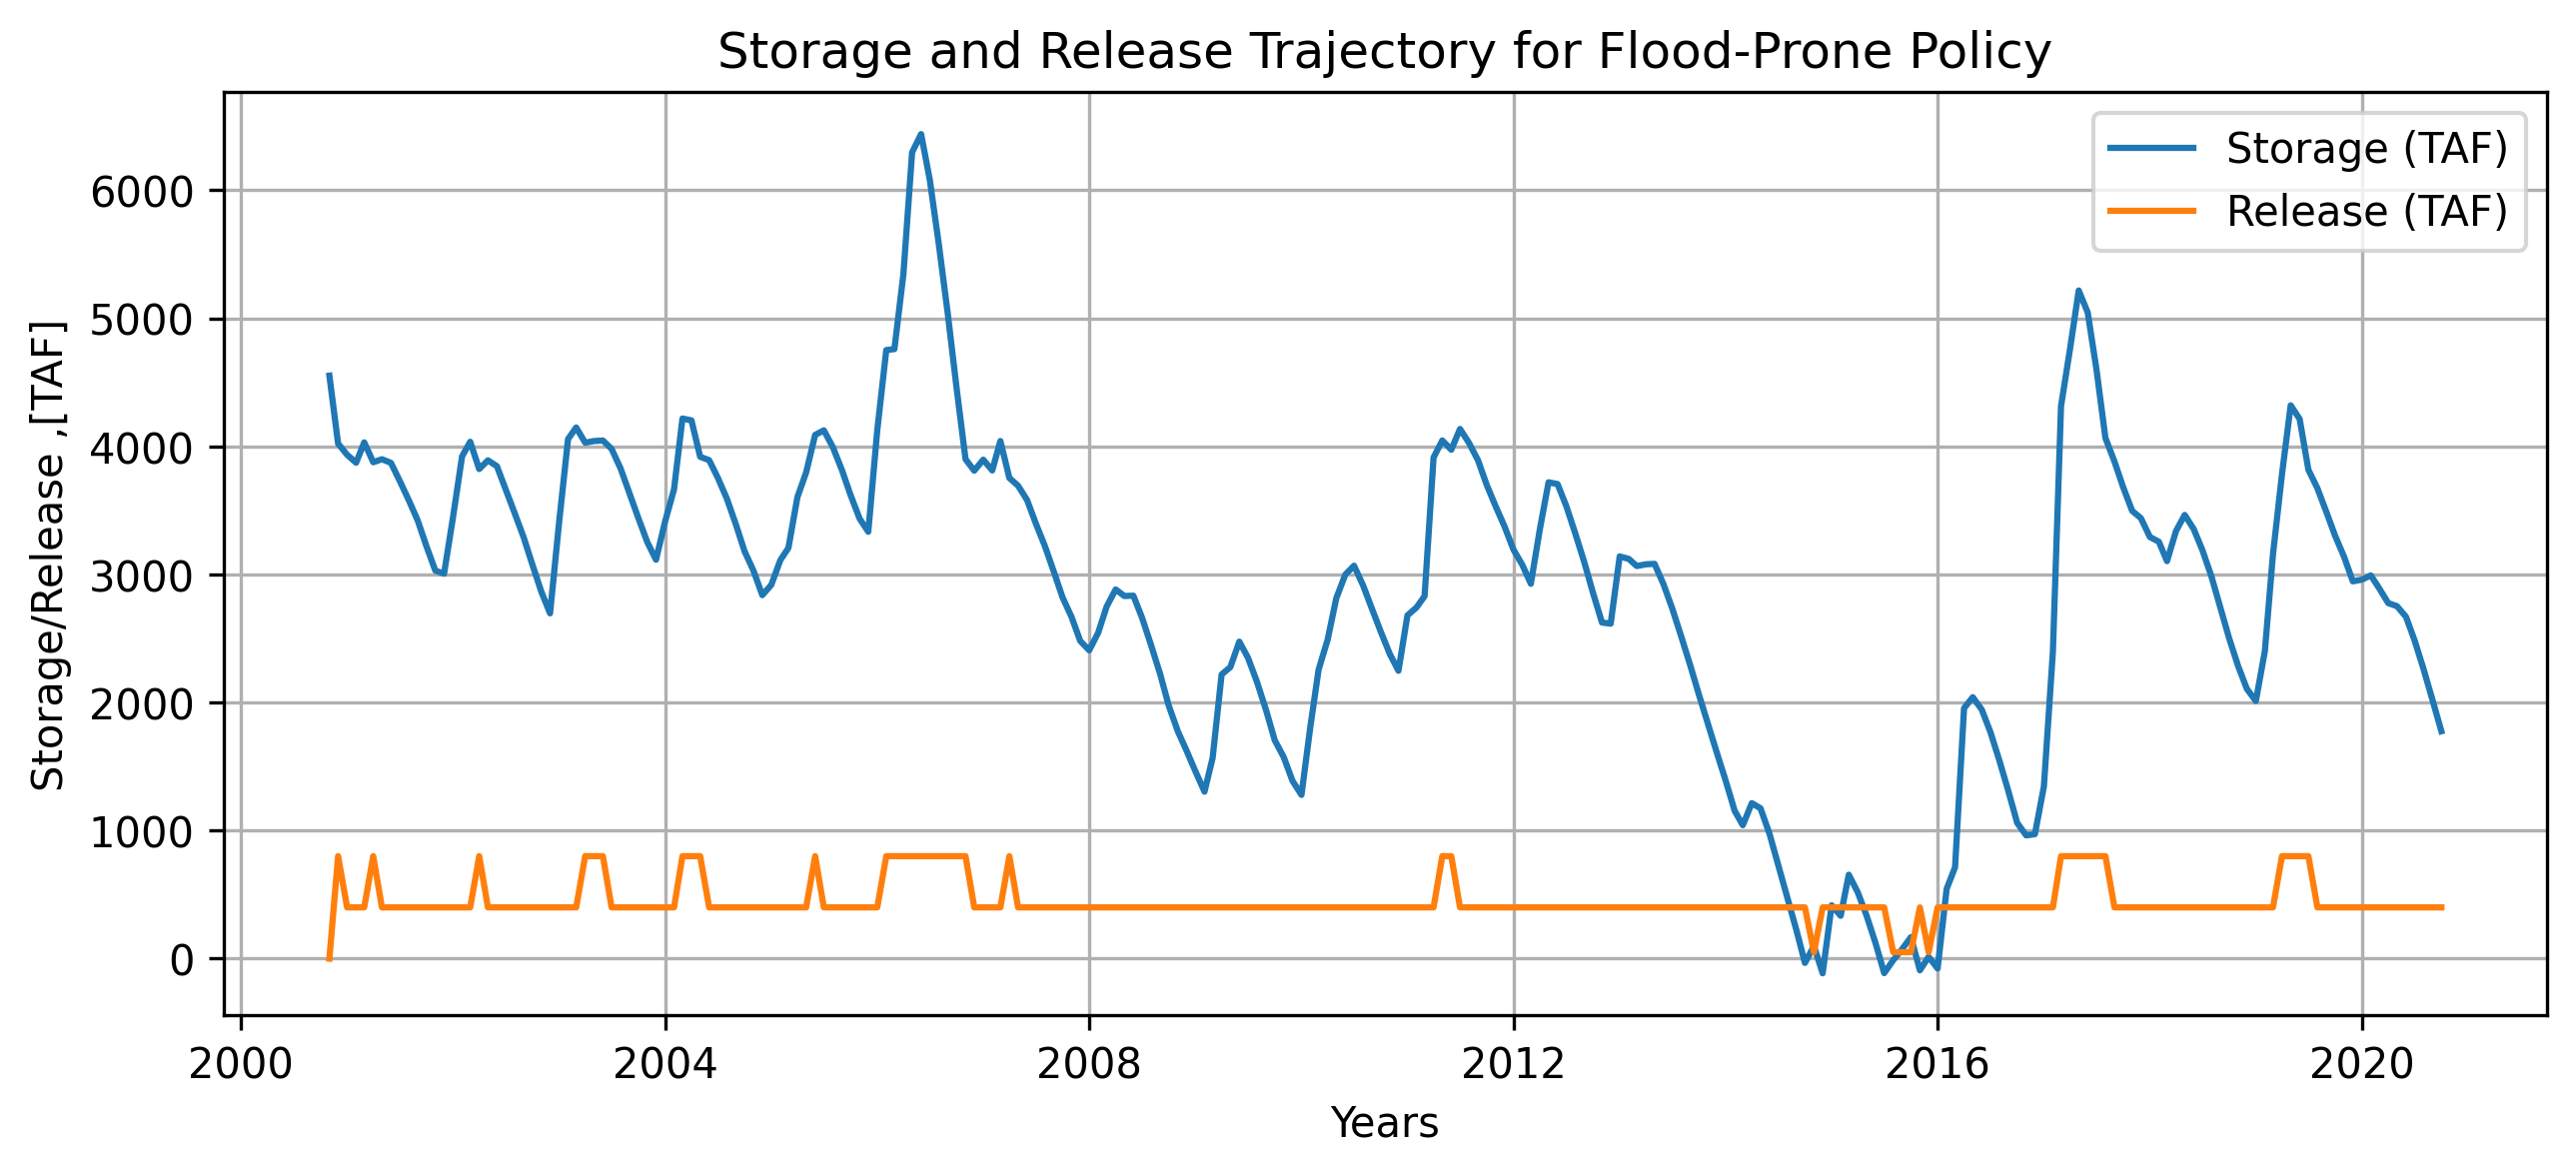

<Figure size 3000x1200 with 0 Axes>

In [74]:
# Identify a Flood-Prone Policy (this is best achieved when max_NFE is about 10000)
# Find a solution with a high flood indicator and low water deficit indicator
flood_threshold = 11  # Example threshold for "high" flood days
deficit_threshold = 7  # Example threshold for "low" deficit days

# Filter results based on thresholds
filtered_results = [s for s in results
                    if s.objectives[0] > flood_threshold and
                    s.objectives[1] < deficit_threshold]

# If any solutions were found, select the first one

if filtered_results:
    flood_prone_policy = filtered_results[0]
    theta_1, theta_2 = flood_prone_policy.variables
    print(f"Flood-prone policy: Theta_1 = {theta_1}, Theta_2 = {theta_2}")
    #Simulate the policy
    storage, release, _, _ = simulate([theta_1, theta_2])

    #Plot the Trajectories
    plt.plot(date_range, storage, label='Storage (TAF)')
    plt.plot(date_range, release, label='Release (TAF)')
    plt.xlabel('Years')
    plt.ylabel('Storage/Release ,[TAF]')
    plt.title('Storage and Release Trajectory for Flood-Prone Policy')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.savefig('Storage and Release Trajectory.jpg')

else:
    print("No policies found meeting the specified thresholds.")
    print("Consider adjusting the flood_threshold and deficit_threshold or increasing max_NFE in the optimization.")
    # This message helps to diagnose why no policies were found

#Question 6

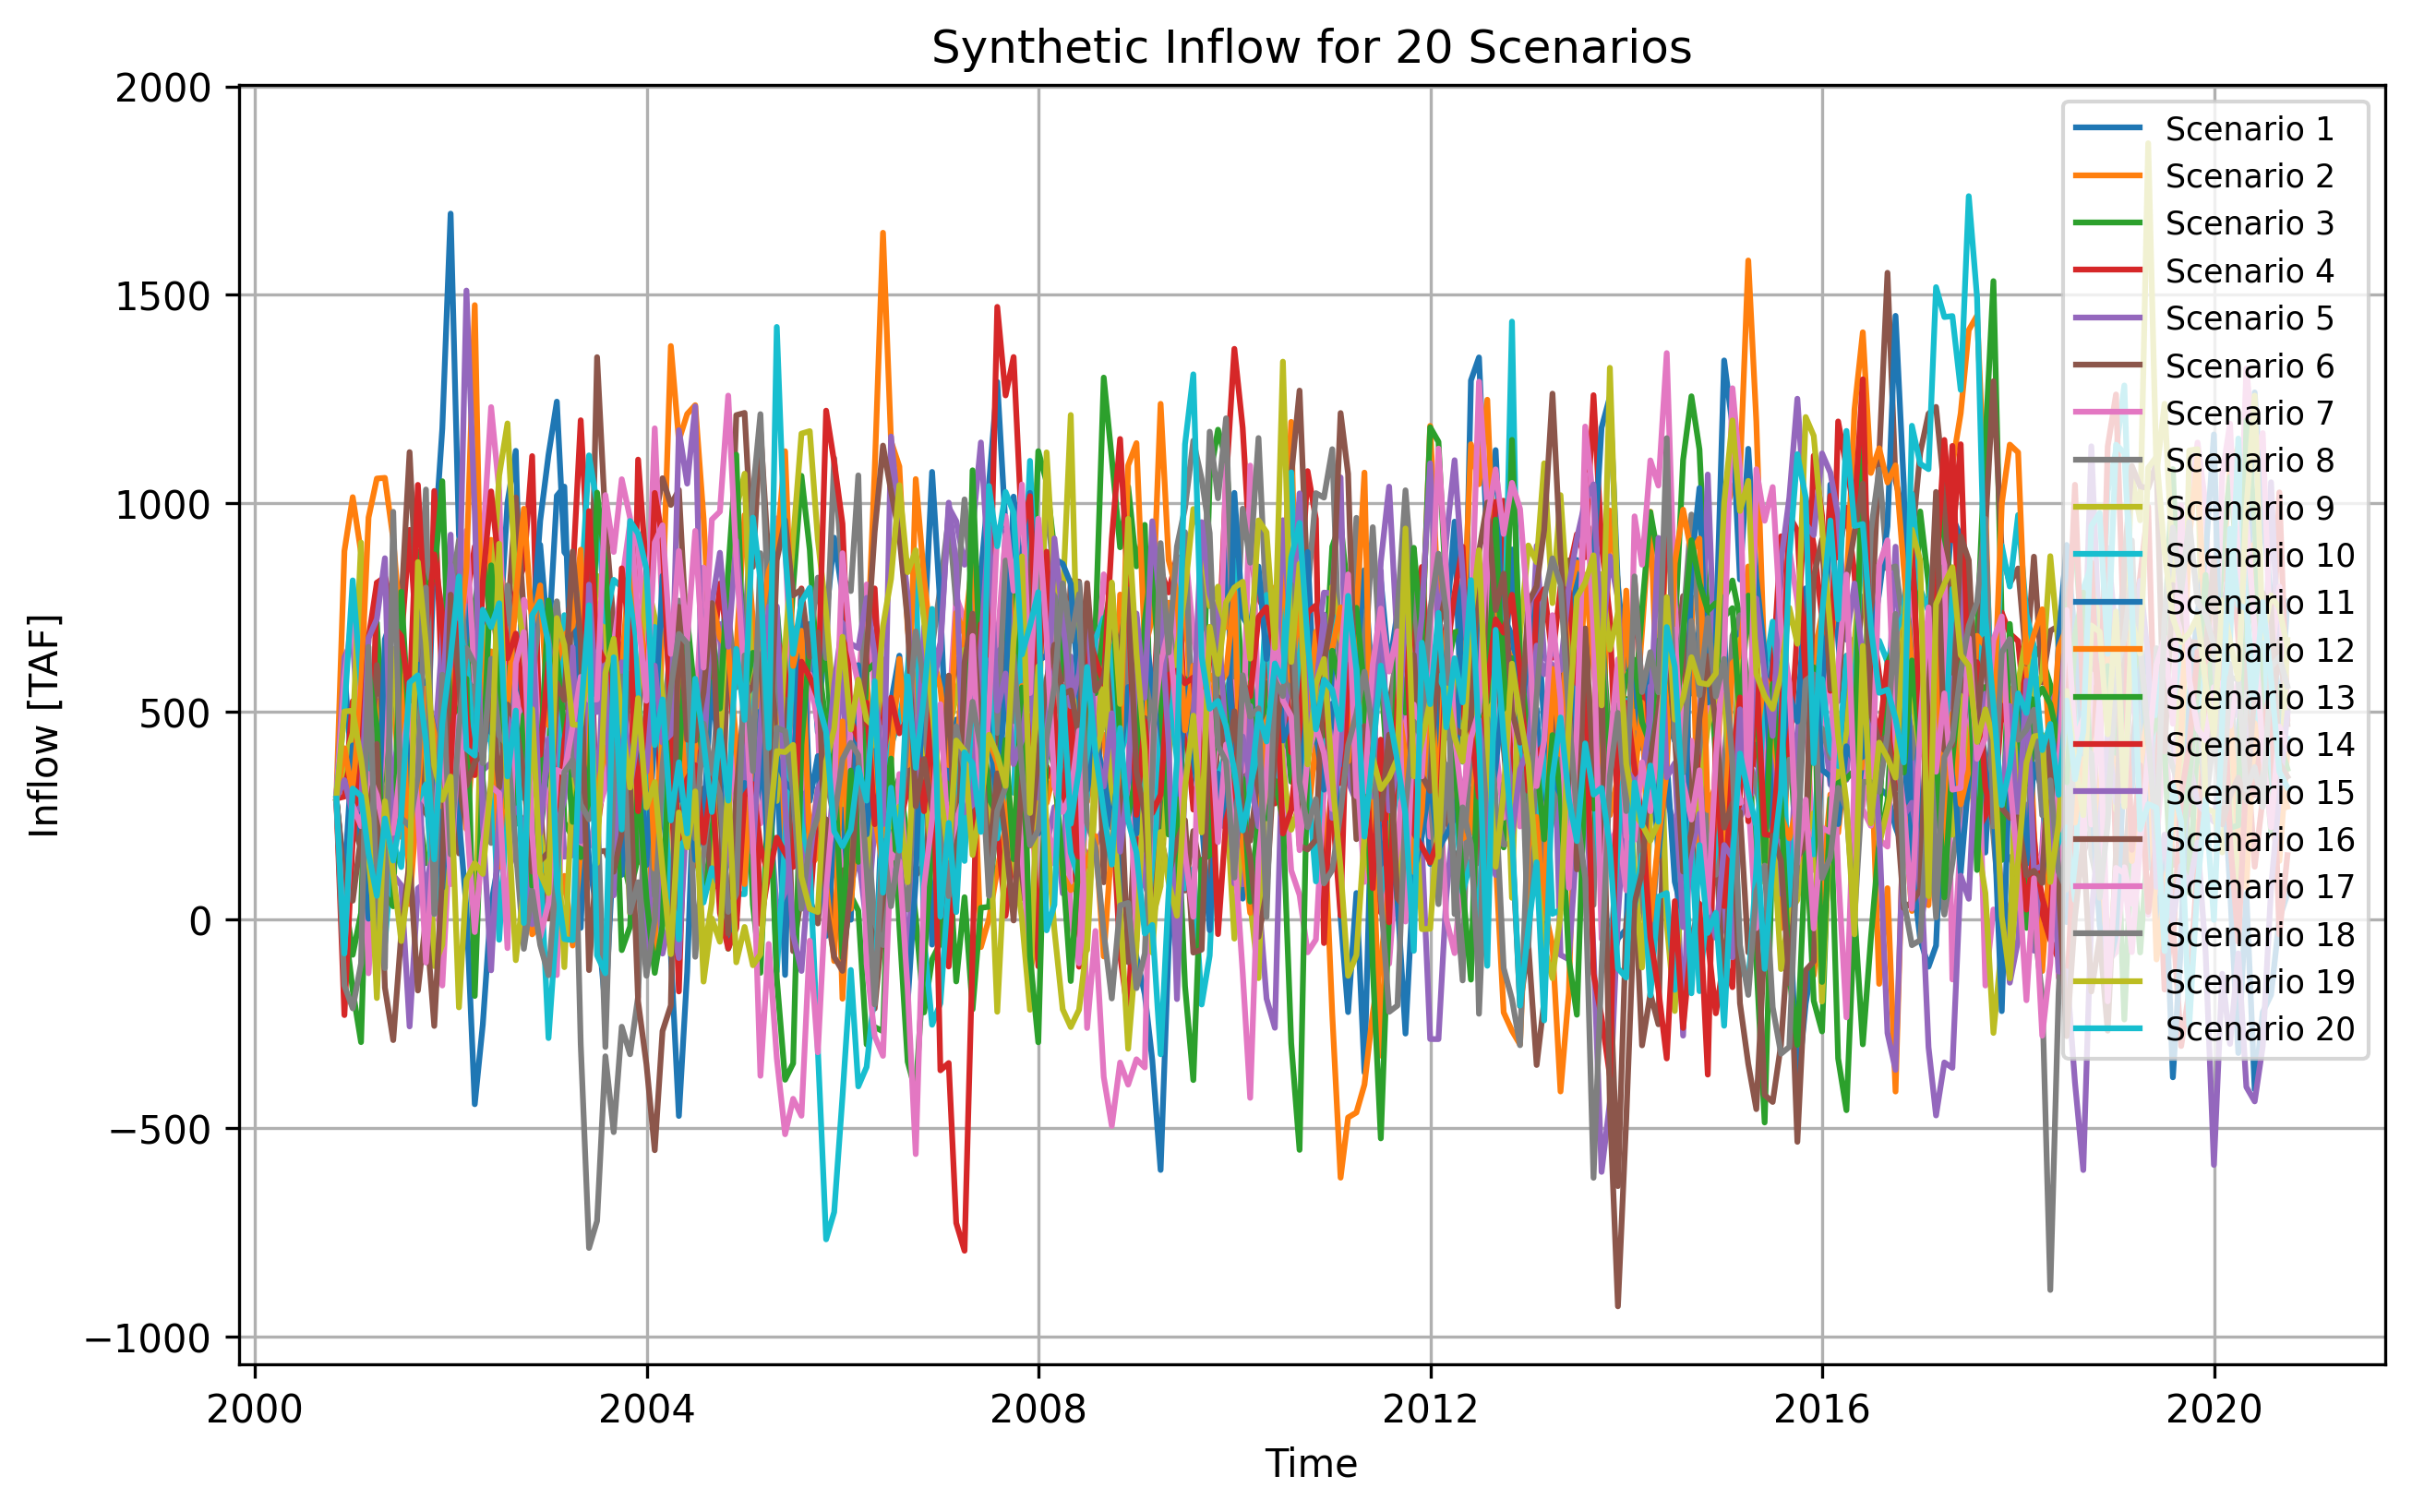

<Figure size 3000x1200 with 0 Axes>

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cfm_to_taf = 2.29568411*10**-8
inflow_data = inflow['SHA_INFLOW_CFMonth'].values*2.29568411*10**-8
#Calculate statistical properties of historical data
mean_inflow = np.mean(inflow_data)
std_inflow = np.std(inflow_data)

#Calculate the lag-1 autocorrelation coefficient
n = len(inflow_data)
autocorr = np.corrcoef(inflow_data[:-1], inflow_data[1:])[0, 1]

#Generate synthetic inflow scenarios
num_scenarios = 20
num_months = len(inflow_data)

synthetic_inflows = np.zeros((num_scenarios, num_months))

for scenario in range(num_scenarios):
    synthetic_inflows[scenario, 0] = inflow_data[0]  # Initialize with the first historical value
    for month in range(1, num_months):
        # Thomas-Fiering model equation
        synthetic_inflows[scenario, month] = (
            mean_inflow +
            autocorr * (synthetic_inflows[scenario, month - 1] - mean_inflow) +
            std_inflow * np.sqrt(1 - autocorr**2) * np.random.normal(0, 1)
        )
        #print(synthetic_inflows)


plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for i in range(synthetic_inflows.shape[0]):  # Iterate through scenarios
    plt.plot(date_range, synthetic_inflows[i, :], label=f'Scenario {i+1}')

plt.xlabel('Time')
plt.ylabel('Inflow [TAF]')
plt.title('Synthetic Inflow for 20 Scenarios')
plt.legend(loc='upper right', fontsize='small')  # Adjust legend location/size as needed
plt.grid(True)
plt.show()
plt.savefig('synthetic_inflows.jpg')

#Question 7

In [62]:
#Calculate the indicators for the historical time series

# 1-month peak flow for historical data
historical_peak_flow = np.max(inflow_data)

# Lowest consecutive 3-months flow for historical data
historical_min_3month = np.min(pd.Series(inflow_data).rolling(3).sum())

print(f"Historical 1-month peak flow: {historical_peak_flow}")
print(f"Historical lowest consecutive 3-months flow: {historical_min_3month}")

#Calculate indicators for each synthetic scenario
synthetic_peak_flows = np.max(synthetic_inflows, axis=1)
synthetic_min_3months = np.min(pd.DataFrame(synthetic_inflows).rolling(3, axis=1).sum().values, axis=1)

print(f"Synthetic 1-month peak flows:\n{synthetic_peak_flows}")
print(f"Synthetic lowest consecutive 3-months flows:\n{synthetic_min_3months}")

#Compare the ranges

#Calculate ranges for synthetic data
peak_flow_range_synthetic = np.ptp(synthetic_peak_flows)  # Peak-to-peak (range) of peak flows
min_3month_range_synthetic = np.ptp(synthetic_min_3months)  # Range of min 3-month flows

print(f"Range of synthetic 1-month peak flows: {peak_flow_range_synthetic}")
print(f"Range of synthetic lowest consecutive 3-months flows: {min_3month_range_synthetic}")

# Compare with historical values
print(f"Historical 1-month peak flow: {historical_peak_flow}")
print(f"Historical lowest consecutive 3-months flow: {historical_min_3month}")

Historical 1-month peak flow: 2717.1028420727
Historical lowest consecutive 3-months flow: 421.102809208218
Synthetic 1-month peak flows:
[1420.33531304 1380.92552661 1266.19308402 1339.37563063 1411.65119921
 1312.75675986 1266.36931905 1279.64853764 1538.91055139 1526.5645372
 1431.68603121 1486.89826945 1626.19309915 1475.99301414 1359.07762441
 1530.49811657 1259.17603712 1443.78642502 1353.94665269 1325.55437766]
Synthetic lowest consecutive 3-months flows:
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
Range of synthetic 1-month peak flows: 367.0170620288825
Range of synthetic lowest consecutive 3-months flows: nan
Historical 1-month peak flow: 2717.1028420727
Historical lowest consecutive 3-months flow: 421.102809208218


<ipython-input-62-bcab35150626>:14: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  synthetic_min_3months = np.min(pd.DataFrame(synthetic_inflows).rolling(3, axis=1).sum().values, axis=1)


Historical 1-month peak flow: 2717.1028420727
Historical lowest consecutive 3-months flow: 421.102809208218
Synthetic 1-month peak flows:
[1420.33531304 1380.92552661 1266.19308402 1339.37563063 1411.65119921
 1312.75675986 1266.36931905 1279.64853764 1538.91055139 1526.5645372
 1431.68603121 1486.89826945 1626.19309915 1475.99301414 1359.07762441
 1530.49811657 1259.17603712 1443.78642502 1353.94665269 1325.55437766]
Synthetic lowest consecutive 3-months flows:
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
Range of synthetic 1-month peak flows: 367.0170620288825
Range of synthetic lowest consecutive 3-months flows: nan
Historical 1-month peak flow: 2717.1028420727
Historical lowest consecutive 3-months flow: 421.102809208218


<ipython-input-65-ca245c71ed9d>:13: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  synthetic_min_3months = np.min(pd.DataFrame(synthetic_inflows).rolling(3, axis=1).sum().values, axis=1)


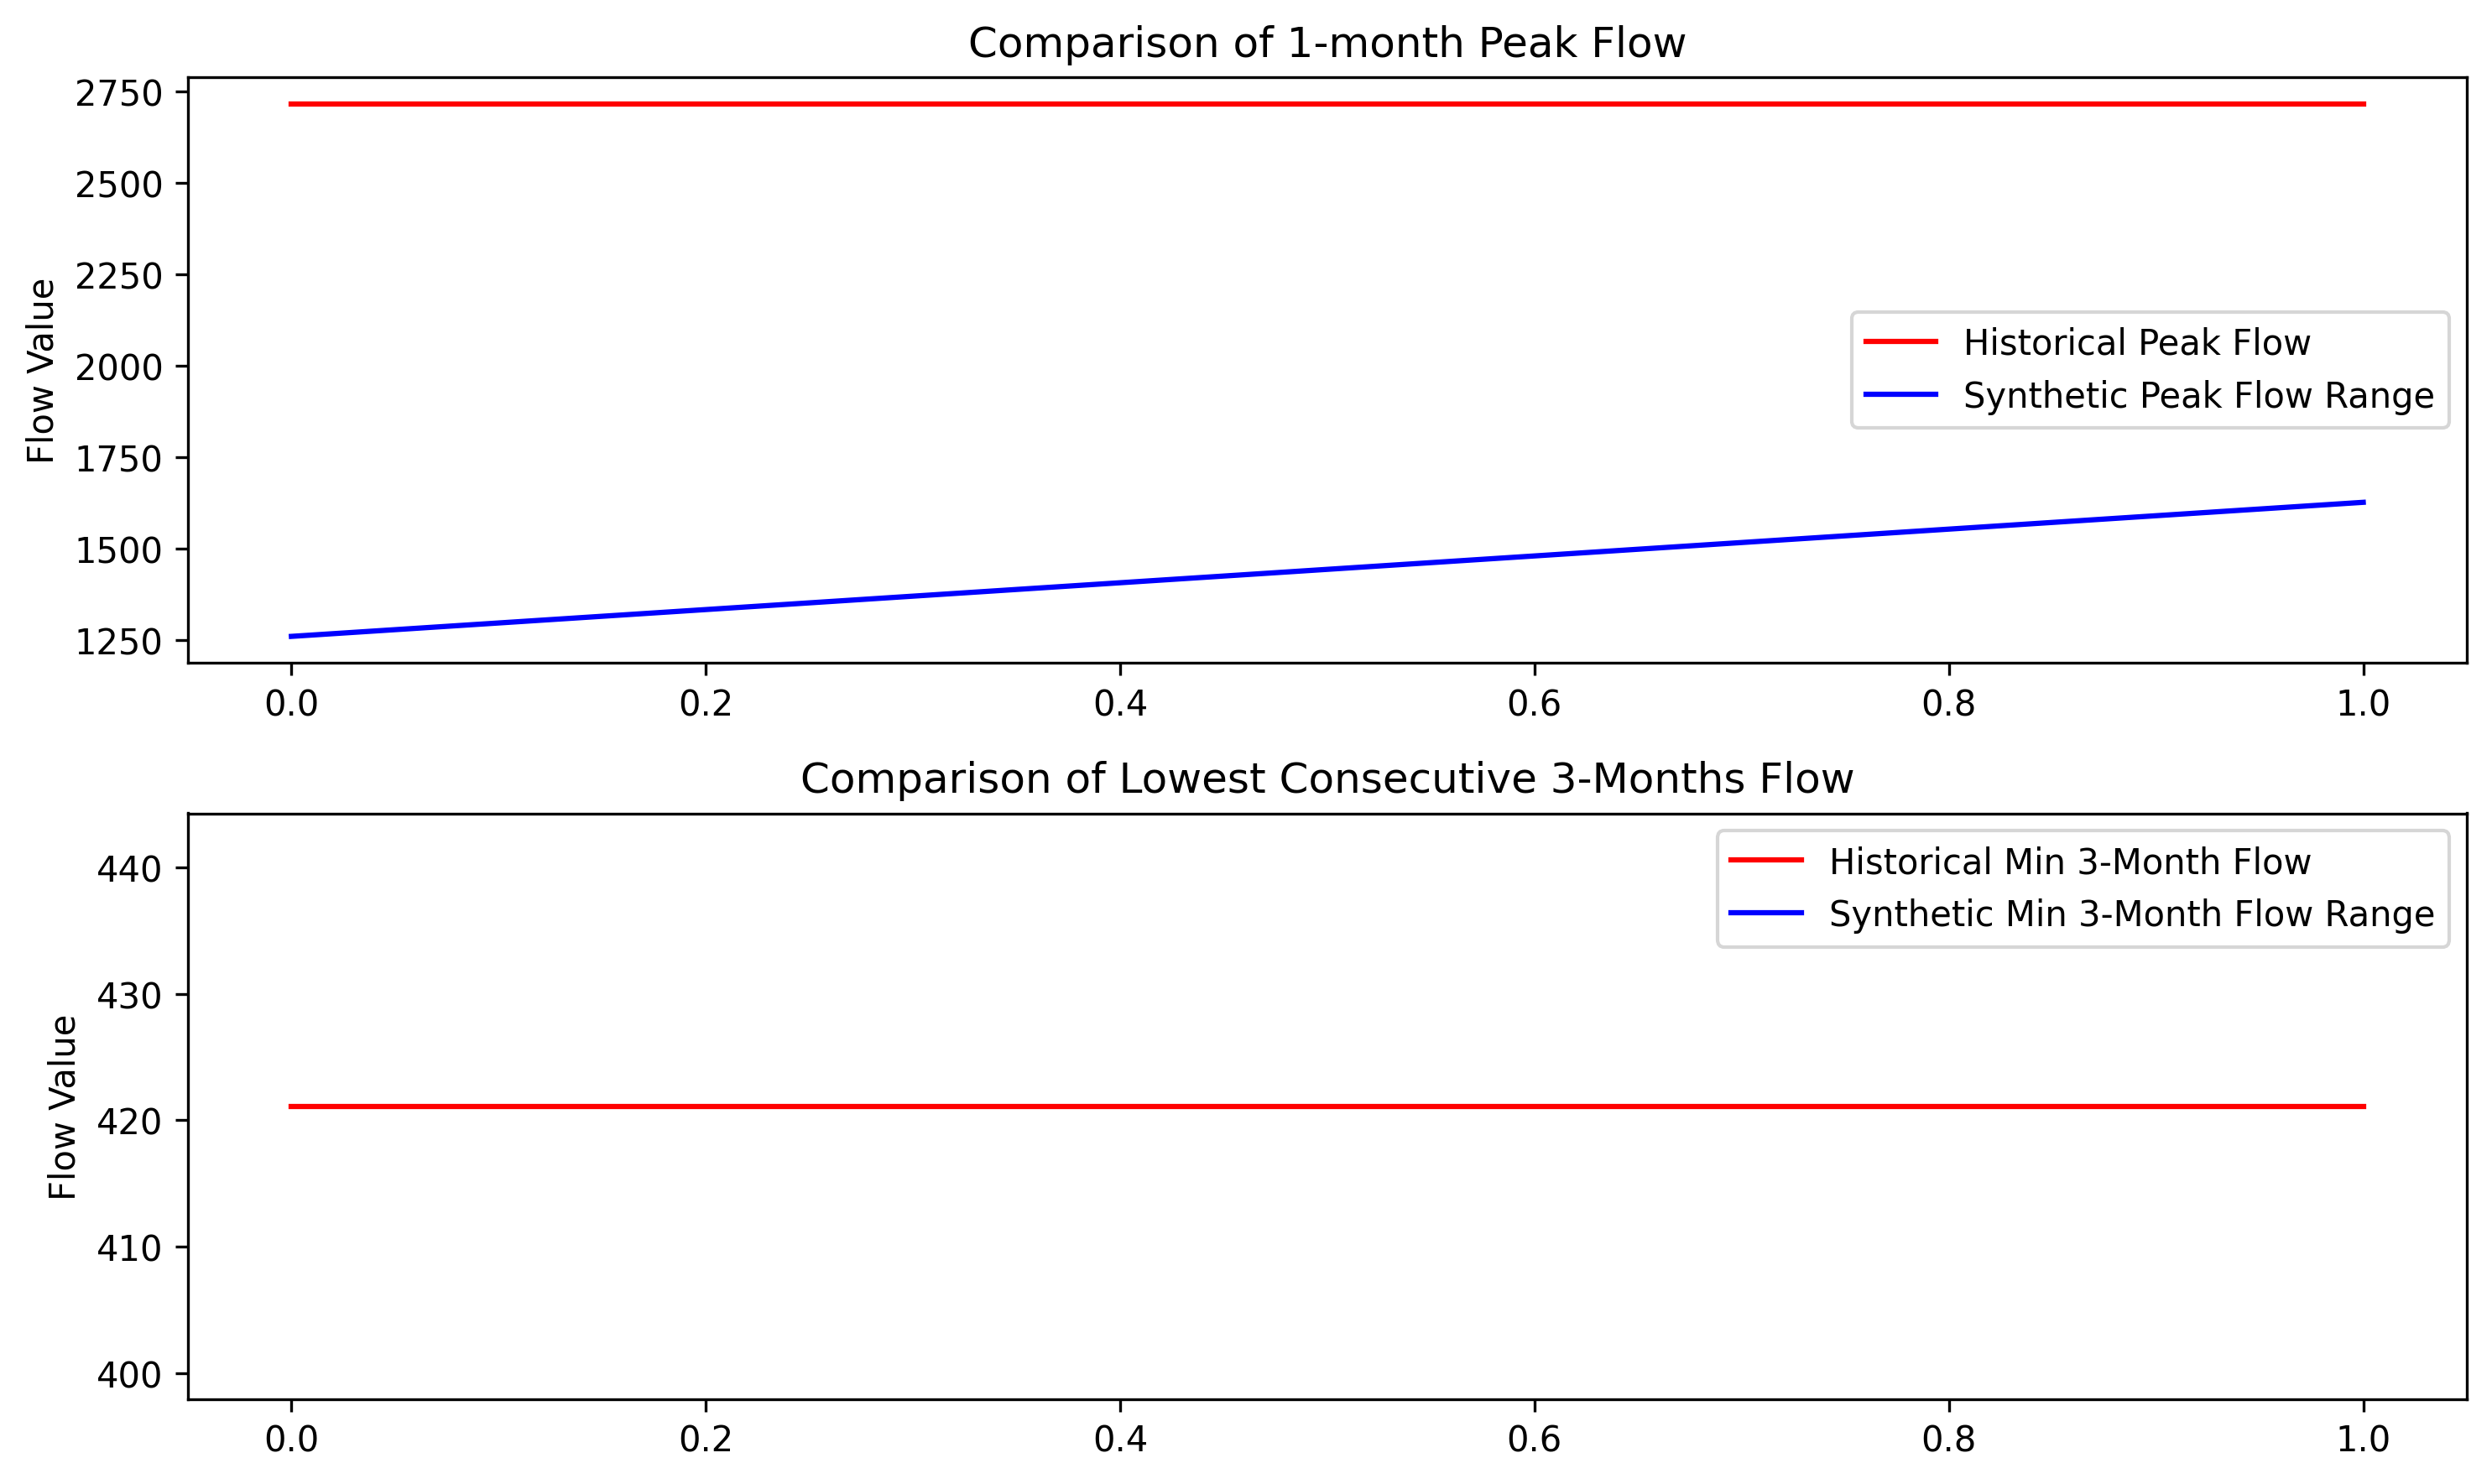

In [65]:
#Calculate the indicators for the historical time series
# 1-month peak flow for historical data
historical_peak_flow = np.max(inflow_data)

# Lowest consecutive 3-months flow for historical data
historical_min_3month = np.min(pd.Series(inflow_data).rolling(3).sum())

print(f"Historical 1-month peak flow: {historical_peak_flow}")
print(f"Historical lowest consecutive 3-months flow: {historical_min_3month}")

#Calculate indicators for each synthetic scenario
synthetic_peak_flows = np.max(synthetic_inflows, axis=1)
synthetic_min_3months = np.min(pd.DataFrame(synthetic_inflows).rolling(3, axis=1).sum().values, axis=1)

print(f"Synthetic 1-month peak flows:\n{synthetic_peak_flows}")
print(f"Synthetic lowest consecutive 3-months flows:\n{synthetic_min_3months}")

#Compare the ranges
# Calculate ranges
peak_flow_range_synthetic = np.ptp(synthetic_peak_flows)
min_3month_range_synthetic = np.ptp(synthetic_min_3months)

print(f"Range of synthetic 1-month peak flows: {peak_flow_range_synthetic}")
print(f"Range of synthetic lowest consecutive 3-months flows: {min_3month_range_synthetic}")

# Compare with historical values
print(f"Historical 1-month peak flow: {historical_peak_flow}")
print(f"Historical lowest consecutive 3-months flow: {historical_min_3month}")

#Plot to compare the ranges

import matplotlib.pyplot as plt
import numpy as np

# ... (previous code to calculate indicators and ranges) ...

# Plotting the comparison ranges
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# 1-month Peak Flow
plt.subplot(2, 1, 1)  # Create two subplots, one for each indicator
plt.plot([0, 1], [historical_peak_flow, historical_peak_flow], 'r-', label='Historical Peak Flow')
plt.plot([0, 1], [np.min(synthetic_peak_flows), np.max(synthetic_peak_flows)], 'b-', label='Synthetic Peak Flow Range')
plt.title('Comparison of 1-month Peak Flow')
plt.ylabel('Flow Value')
plt.legend()

# Lowest Consecutive 3-Months Flow
plt.subplot(2, 1, 2)
plt.plot([0, 1], [historical_min_3month, historical_min_3month], 'r-', label='Historical Min 3-Month Flow')
plt.plot([0, 1], [np.min(synthetic_min_3months), np.max(synthetic_min_3months)], 'b-', label='Synthetic Min 3-Month Flow Range')
plt.title('Comparison of Lowest Consecutive 3-Months Flow')
plt.ylabel('Flow Value')
plt.legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


#Question 8

In [68]:

def simulate_for_scenario(thresholds, inflows, demand):

    # Initialize storage, flood, and deficit variables
    storage = 0
    flood = 0
    deficit = 0

    # Loop through each time step
    for inflow in inflows:
        # Calculate release based on thresholds and demand
        release = min(storage + inflow, thresholds[1], demand)  # Release up to demand, theta_2, or available water

        # Update storage
        storage = storage + inflow - release

        # Check for flood and deficit conditions
        if storage > thresholds[0]:
            flood += storage - thresholds[0]  # Accumulate flood volume
            storage = thresholds[0]  # Reset storage to threshold

        if release < demand:
            deficit += demand - release  # Accumulate deficit volume

    # Calculate indicators (e.g., total flood volume, total deficit volume, etc.)
    flood_indicator = flood
    deficit_indicator = deficit

    return flood_indicator, deficit_indicator

theta_1 = 238.5
theta_2 = 4549.2
demand = 400
flood_indicators = []
deficit_indicators = []
num_scenarios=20
for scenario in range(num_scenarios):
    inflow_scenario = synthetic_inflows[scenario, :]
    flood_ind, deficit_ind = simulate_for_scenario([theta_1, theta_2], inflow_scenario, demand)
    flood_indicators.append(flood_ind)
    deficit_indicators.append(deficit_ind)

#Question 9

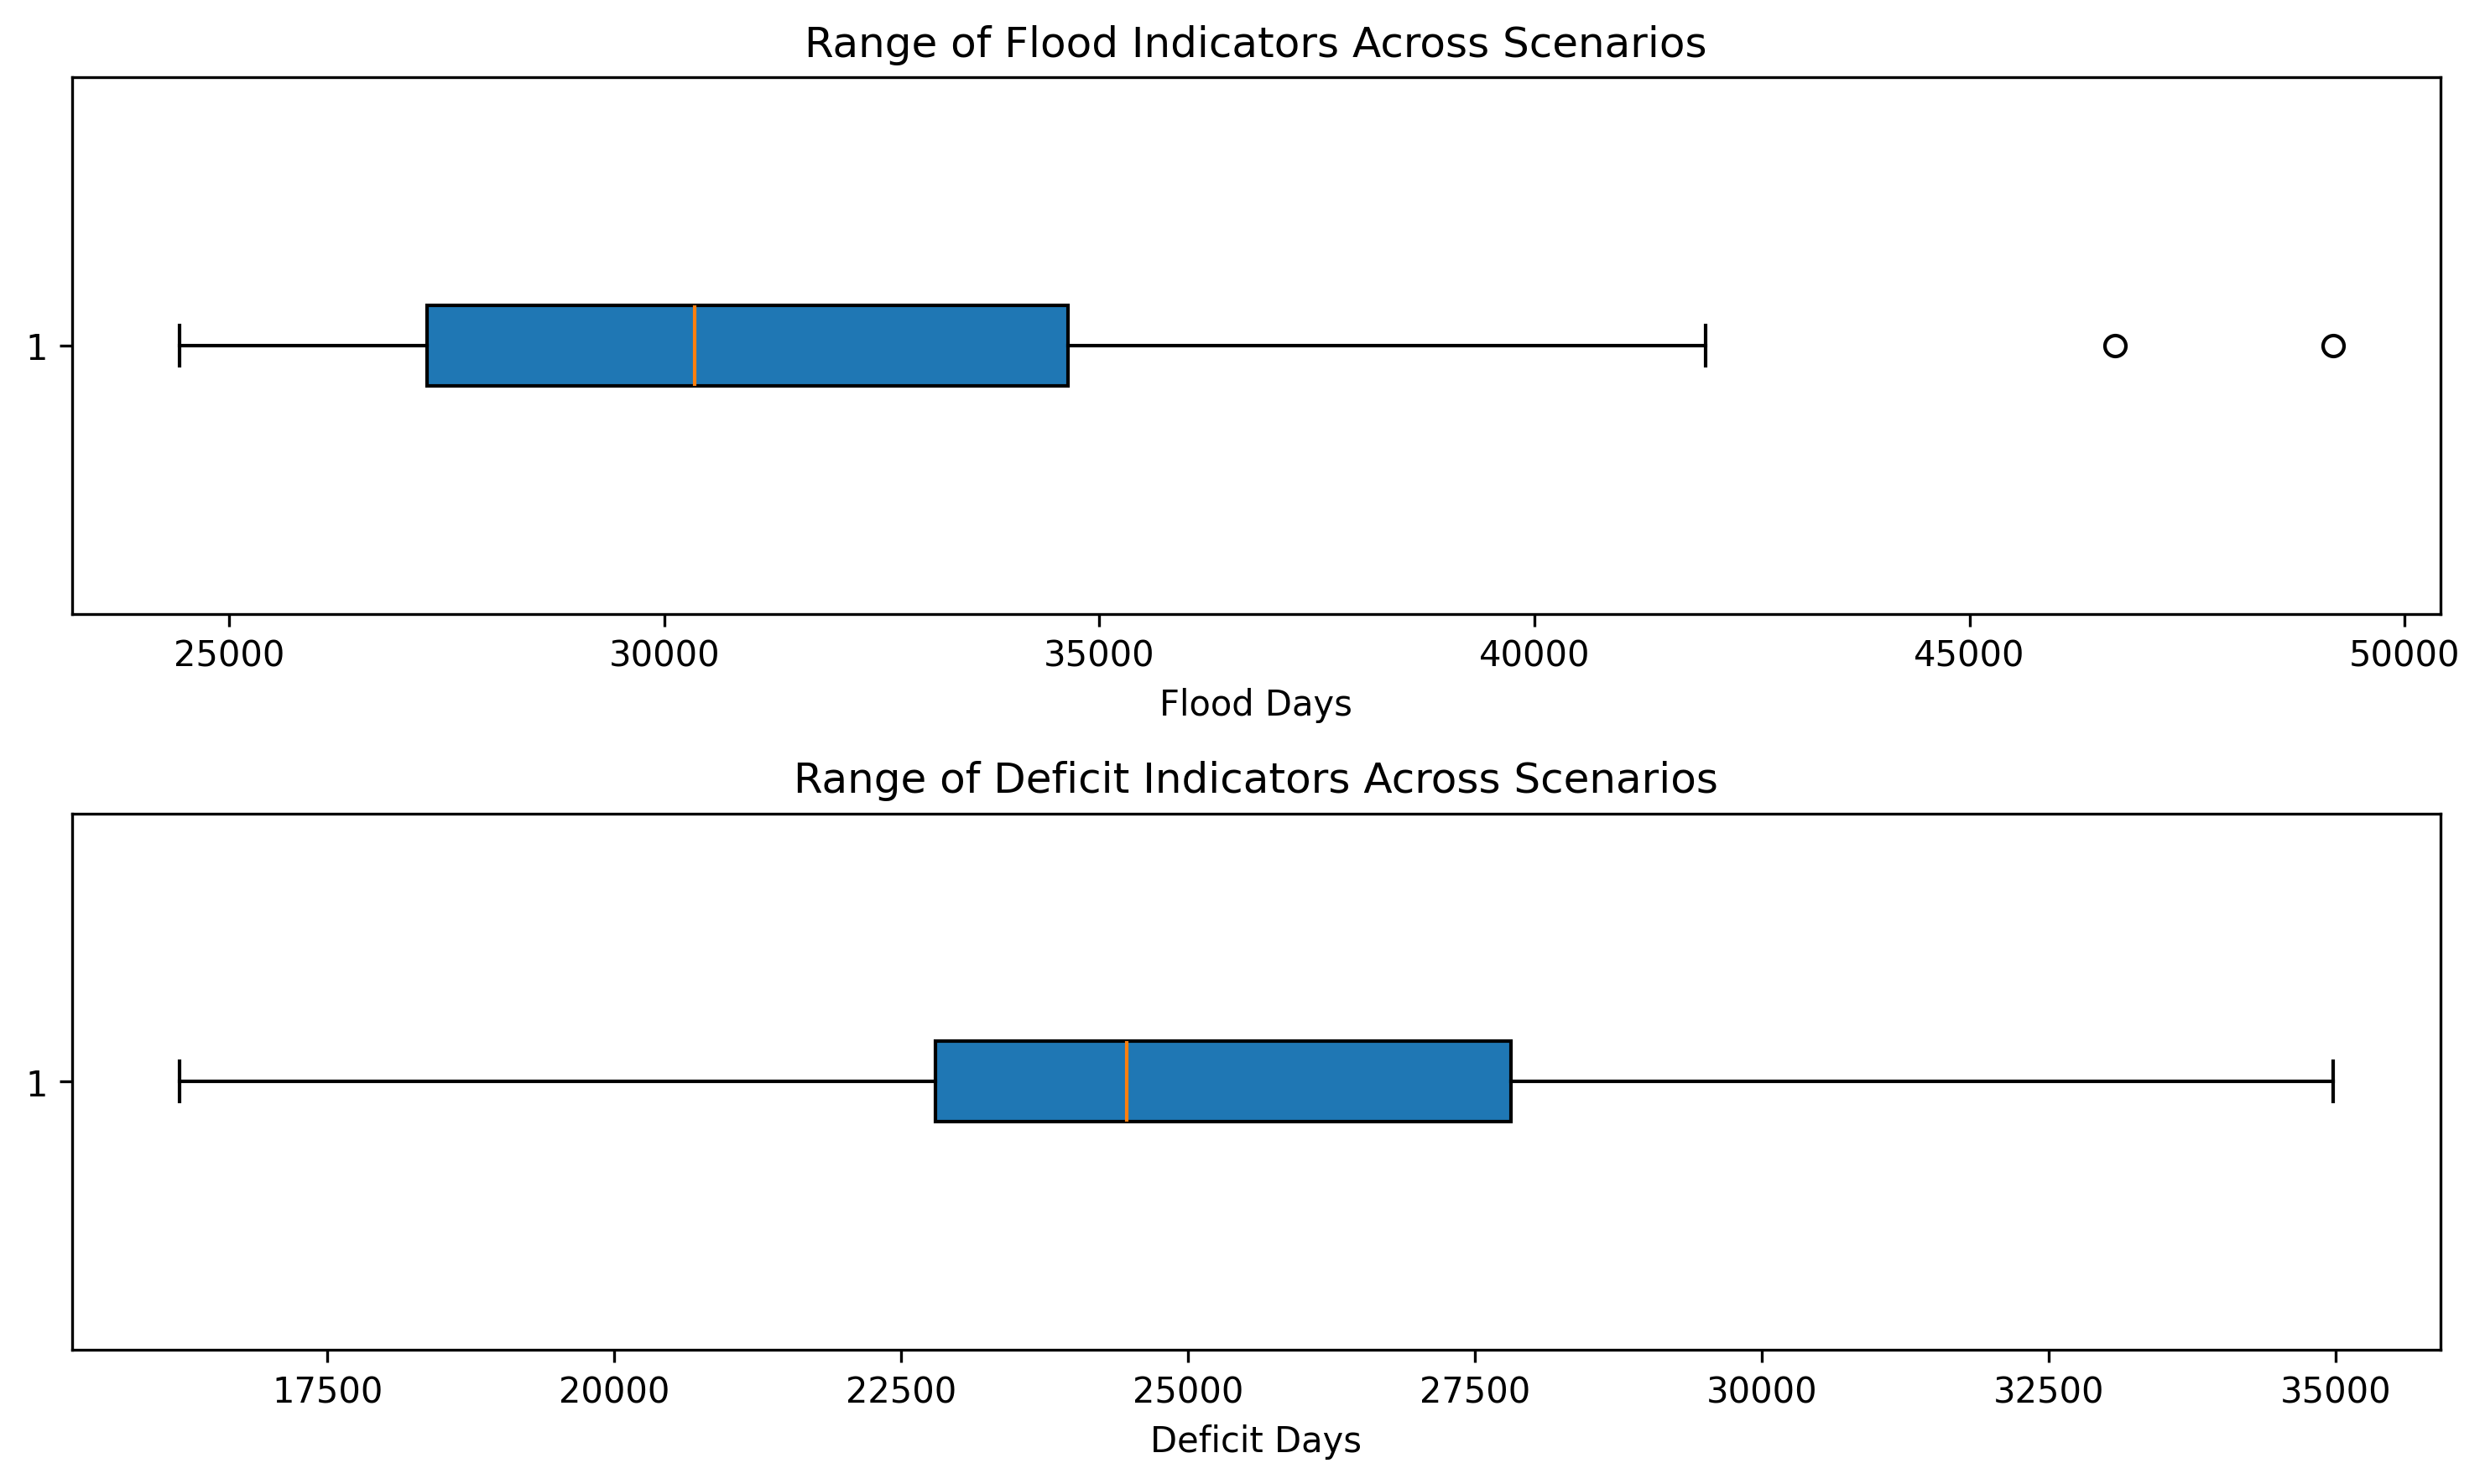

<Figure size 3000x1200 with 0 Axes>

In [72]:
import matplotlib.pyplot as plt
import numpy as np

def simulate_for_scenario(thresholds, inflows, demand):

    # Initialize storage, flood, and deficit variables
    storage = 0
    flood = 0
    deficit = 0

    # Loop through each time step
    for inflow in inflows:
        # Calculate release based on thresholds and demand
        release = min(storage + inflow, thresholds[1], demand)  # Release up to demand, theta_2, or available water

        # Update storage
        storage = storage + inflow - release

        # Check for flood and deficit conditions
        if storage > thresholds[0]:
            flood += storage - thresholds[0]  # Accumulate flood volume
            storage = thresholds[0]  # Reset storage to threshold

        if release < demand:
            deficit += demand - release  # Accumulate deficit volume

    # Calculate indicators (e.g., total flood volume, total deficit volume, etc.)
    flood_indicator = flood
    deficit_indicator = deficit

    return flood_indicator, deficit_indicator

theta_1 = 238.5
theta_2 = 4549.2
demand = 400
flood_indicators = []
deficit_indicators = []
num_scenarios=20
for scenario in range(num_scenarios):
    inflow_scenario = synthetic_inflows[scenario, :]
    flood_ind, deficit_ind = simulate_for_scenario([theta_1, theta_2], inflow_scenario, demand)
    flood_indicators.append(flood_ind)
    deficit_indicators.append(deficit_ind)

# Plotting the ranges
plt.figure(figsize=(10, 6))

# Flood Indicator Range
plt.subplot(2, 1, 1)
plt.boxplot(flood_indicators, vert=False, patch_artist=True)  # Box plot for flood indicators
plt.xlabel('Flood Days')
plt.title('Range of Flood Indicators Across Scenarios')

# Deficit Indicator Range
plt.subplot(2, 1, 2)
plt.boxplot(deficit_indicators, vert=False, patch_artist=True)  # Box plot for deficit indicators
plt.xlabel('Deficit Days')
plt.title('Range of Deficit Indicators Across Scenarios')

plt.tight_layout()
plt.show()
plt.savefig('boxplot.jpg')